## 에러 데이터 분석

In [8]:
import pandas as pd
import numpy as np
import matplotlib
font = {'size': 16, 'family':"NanumGothic"}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

data_path = 'data/'


### 학습 데이터 로드

In [9]:
train_err = pd.read_csv(data_path + 'train_err_data.csv')

# 전처리
# 중복제거
train_err.drop_duplicates(inplace=True)
train_err = train_err.reset_index(drop=True)

# fwver의 8.x.x를 08.x.x로 변경
idx = train_err['fwver'] == '8.5.3'
train_err.loc[idx, 'fwver'] = '08.5.3'

### model별, fwver별 평균 에러 발생량

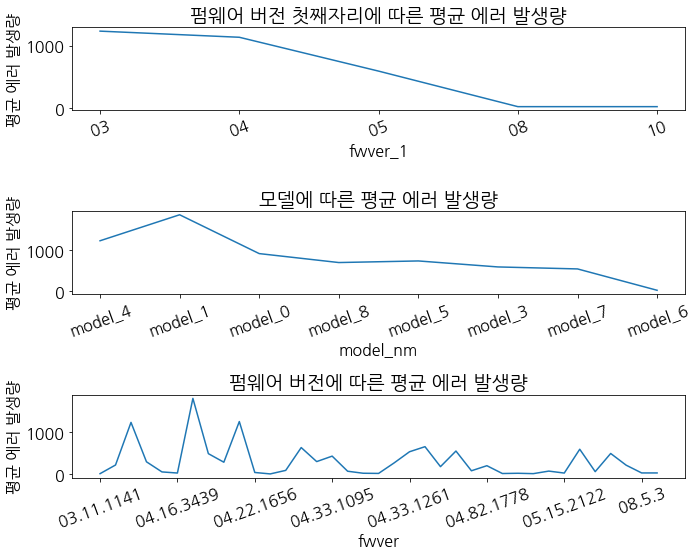

In [15]:
train_err['fwver_1'] = [col[:2] for col in train_err['fwver'].values]

unique_fwver = np.unique(train_err['fwver'].astype(str))
group = train_err.groupby('fwver')

df_fwver = pd.DataFrame(columns = unique_fwver)
for fwver in unique_fwver:
    df_fwver.loc[0, fwver] = len(np.unique(group.get_group(fwver)['user_id']))
    df_fwver.loc[1, fwver] = group.get_group(fwver)['user_id'].shape[0]
df_fwver.index = ['사용자 수','에러 발생량']

unique_model = ['model_'+str(i) for i in [4,1,0,1,8,5,3,7,6]]
# unique_model = np.unique(train_err['model_nm'].astype(str))
group = train_err.groupby('model_nm')

df_model = pd.DataFrame(columns = unique_fwver)
for model in unique_model:
    df_model.loc[0, model] = len(np.unique(group.get_group(model)['user_id']))
    df_model.loc[1, model] = group.get_group(model)['user_id'].shape[0]
df_model.index = ['사용자 수','에러 발생량']

unique_fwver_1 = np.unique(train_err['fwver_1'].astype(str))
group = train_err.groupby('fwver_1')

df_fwver_1 = pd.DataFrame(columns = unique_fwver_1)
for fwver_1 in unique_fwver_1:
    df_fwver_1.loc[0, fwver_1] = len(np.unique(group.get_group(fwver_1)['user_id']))
    df_fwver_1.loc[1, fwver_1] = group.get_group(fwver_1)['user_id'].shape[0]
df_fwver_1.index = ['사용자 수','에러 발생량']

plt.figure(1, figsize=(10,8))
plt.subplot(3,1,1)
df_fwver_1.loc['평균 에러 발생량',:] = df_fwver_1.T['에러 발생량'] / df_fwver_1.T['사용자 수']
df_fwver_1.T['평균 에러 발생량'].plot()
plt.xticks(range(df_fwver_1.shape[1]),df_fwver_1.columns, rotation=20)
plt.ylabel('평균 에러 발생량')
plt.xlabel('fwver_1')
plt.title('펌웨어 버전 첫째자리에 따른 평균 에러 발생량')
# plt.show()

plt.subplot(3,1,2)
df_model.loc['평균 에러 발생량',:] = df_model.T['에러 발생량'] / df_model.T['사용자 수']
df_model.T['평균 에러 발생량'].plot(ax=plt.gca())
plt.xticks(rotation=20)
plt.ylabel('평균 에러 발생량')
plt.xlabel('model_nm')
plt.title('모델에 따른 평균 에러 발생량')


plt.subplot(3,1,3)
df_fwver.loc['평균 에러 발생량',:] = df_fwver.T['에러 발생량'] / df_fwver.T['사용자 수']
df_fwver.T['평균 에러 발생량'].plot()
# df_fwver_col_breif = [c[:4] for c in df_fwver.columns]
plt.xticks(rotation=20)
plt.ylabel('평균 에러 발생량')
plt.xlabel('fwver')
plt.title('펌웨어 버전에 따른 평균 에러 발생량')

plt.tight_layout()
plt.show()

### 각 error type에 어떤 error code가 있고 각각이 몇개씩인지 err_code_dict에 정리

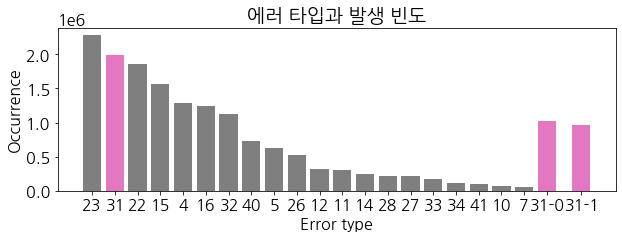

In [11]:
v, c = np.unique(train_err['errtype'], return_counts = True)

idx2 = err_type == 31
err_code_sub = err_code.loc[idx2].values
# remove space
# err_code_sub = [s.replace(' ','') for s in err_code_sub]
v2, c2 = np.unique(err_code_sub, return_counts=True)

## 에러 타입과 발생 빈도
idx = np.argsort(c)
idx = idx[::-1]
NUM_SHOW = 20
plt.figure(figsize=(10,3))
plt.title('에러 타입과 발생 빈도')
plt.bar(range(NUM_SHOW), list(c[idx[:NUM_SHOW]]), color = 'tab:gray')
plt.bar([1, NUM_SHOW, NUM_SHOW+1.5], [c[idx[:NUM_SHOW]][1]] + list(c2), color = 'tab:pink')
plt.xticks(list(range(NUM_SHOW)) + [NUM_SHOW, NUM_SHOW+1.5], list(v[idx[:NUM_SHOW]]) + ['31-0','31-1'])
plt.xlabel('Error type')
plt.ylabel('Occurrence')
plt.show()

### Error type 38 추가 분석

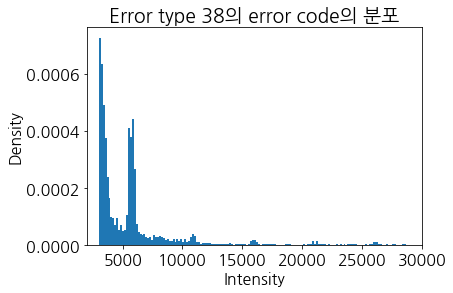

In [13]:
import seaborn as sns
err_type = train_err['errtype']
err_code = train_err['errcode'].astype(str)

idx_38 = err_type == 38

values = err_code.loc[idx_38].values.astype(int)
values_mean = values.mean()
values_std = values.std()

plt.hist(values, bins=30000, density=True)
plt.xlim(2000, 30000)
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.title('Error type 38의 error code의 분포')
plt.show()